In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df_POI = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\Pennsylvania_POIs.csv")

C:\Users\Jonas\AppData\Local\Temp\ipykernel_4344\1227523109.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,88,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_POI = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\Pennsylvania_POIs.csv")


In [3]:
df_POI.head()

,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,...,convenience,cosmetics,gas,golf,laundry,lottery,outdoor,pet,swimming_pool,zoo
0,0,6,1428537863,0,25479855,"{""addr:state"":""PA""}",40.231117,-76.95476,Camp Hill,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,1520657173,0,25538032,NaN,40.245075,-76.89795,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12,1653016787,0,25603734,"{""brand"":""Valero"",""brand:wikidata"":""Q1283291""}",40.756462,-75.26402,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,9,1370095762,0,25603735,"{""note"":""Widow Brown's"",""old_name"":""Widow Brow...",40.755157,-75.26238,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9,1275202554,0,25612775,NaN,40.75601,-75.26321,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df_POI)

159343

In [4]:
POItypes = df_POI.nunique()

df_types = pd.DataFrame(POItypes)

df_types

,0
Unnamed: 0,159304
version,51
timestamp,43751
changeset,4
id,86025
...,...
lottery,0
outdoor,0
pet,0
swimming_pool,0


In [6]:
#Dropping all columns consisting of only NAs 
df_POI = df_POI.dropna(axis=1, how='all')

In [5]:
#Percentage of NAs for all columns
na_percentage = df_POI.isna().mean() * 100

df_percentage = pd.DataFrame(na_percentage) 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_percentage

,0
Unnamed: 0,0.024476
version,46.012690
timestamp,46.013317
changeset,56.528997
id,46.012690
tags,66.855777
lat,56.528997
lon,56.529625
addr:city,87.083210
addr:country,99.240632


In [7]:
#Feature selection 

DeletedFeatures = ['email', 'url','name','music','water','zoo','wikipedia','caravan','changeset','tags','addr:country','museum','vacant','tobacco','shop','religion','musical_instrument','games','hairdresser','craft','collector','books','bicycle','theatre', 'source','restaurant','gambling','fuel','fast_food','car_wash','building:levels','url','website','version','geometry','id','clothes','ice_cream','ref'
,'addr:housenumber','addr:housename','addr:place','landuse','bicycle_rental','building','office','social_facility','school','information','guest_house','camp_site','attraction','wholesale','trade','second_hand','organic','music','motorcycle','massage','furniture','fireplace','coffee','car','alcohol','agrarian','start_date','parking','internet_access','fountain','drinking_water','bbq','bar','bicycle_parking','phone', 'addr:city','timestamp','addr:postcode', 'addr:full','addr:street','opening_hours','osm_type']
LocationFeatures = ['id','lat', 'lon','geometry','lon2','lat2']
SelectedFeatures = ['tourism','amenity','atm','operator']

#NAfeature = df_POI[''].dropna(axis=0, how='any')

#print(NAfeature)
#NAfeature.head()
#len(NAfeature)

In [8]:
#Deleting observations that do not make sense
nonsense = [12583,64047,50964,54376,17533,19640,24302,27865,43300,44181]
for i in nonsense:
    df_POI = df_POI.drop(df_POI[df_POI['Unnamed: 0'] == i].index)


In [9]:
len(df_POI)

159333

In [10]:
#Deleting observations without any of our selected features
masks= [] #Empty list

for i in SelectedFeatures:
    masks.append(df_POI[i].isna())  #Adding features to the list
    
masksall = masks[0]  #Start with first in the list

for i in masks[1:]:  #Iterate over list excluding first mask
    masksall = masksall & i  #Combine masks
    
df_POI['masks'] = masksall
    
df_POI['masks'].value_counts()

#We keep 68864 bservations since only those are part of our selected features, the remaining 68864 features we can discard

True     92454
False    66879
Name: masks, dtype: int64

In [11]:
#Check if geometrey is overlapping with lat or lon

df_POI['geo_test'] = df_POI['lat'].isna() & df_POI['lon'].isna() & df_POI['geometry'].notna()

df_POI['geo_test'].head()

df_POI['geo_test'].value_counts()

#Geometry and lat/lon overlap in parts, might not discard geometry just yet

False    142577
True      16756
Name: geo_test, dtype: int64

In [12]:
#Now we can delete the geo_test feature again
del df_POI['geo_test']

In [13]:
# Extract longitude
df_POI['lon2'] = df_POI['geometry'].str.split(' ', expand=True)[1]
df_POI['lon2'] = df_POI['lon2'].str.strip('()')

# Extract latitude
df_POI['lat2'] = df_POI['geometry'].str.split(' ', expand=True)[2]
df_POI['lat2'] = df_POI['lat2'].str.strip(')')

# Removing the 'POINT' and '()' from the original column
#df_POI['coordinates'] = df_POI['coordinates'].str.replace('POINT ', '').str.strip('()')


In [14]:
# Transform str to float for lat and lon

df_POI['lon'] = pd.to_numeric(df_POI['lon'], errors='coerce')
df_POI['lon2'] = pd.to_numeric(df_POI['lon2'], errors='coerce')

df_POI['lat'] = pd.to_numeric(df_POI['lat'], errors='coerce')
df_POI['lat2'] = pd.to_numeric(df_POI['lat2'], errors='coerce')


In [15]:
df_POI = df_POI[~df_POI['masks']] #Drop all obersvations that are 'True' for masks

del df_POI['masks']

len(df_POI)

66879

In [16]:
#Now we delete the features in the vector DeletedFeatures

for i in DeletedFeatures:
    try:
        df_POI.drop(i, axis=1, inplace=True)

    except KeyError:
        print(f"already deleted {i}")

already deleted url
already deleted music


In [ ]:
# Let's now discard any data that is not in the Phildadelphia (docking stations)

In [ ]:
#Check where our docking stations are in Philadelphia

In [17]:
# Locate the coordinate range in which all our docking stations are
selected_columns = ['end_lon', 'end_lat']
df_merged = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\merged_files.csv", usecols=selected_columns)

In [18]:
coordinate_range = (df_merged['end_lon'].min(), df_merged['end_lon'].max(),df_merged['end_lat'].min(),df_merged['end_lat'].max())
print(coordinate_range)

(-75.229462, -75.121567, 39.889938, 40.01112)


In [19]:
# Imagine of Philadelphia from openstreetmap.org
phila_map2 = plt.imread('map.png')

FileNotFoundError: [Errno 2] No such file or directory: 'map.png'

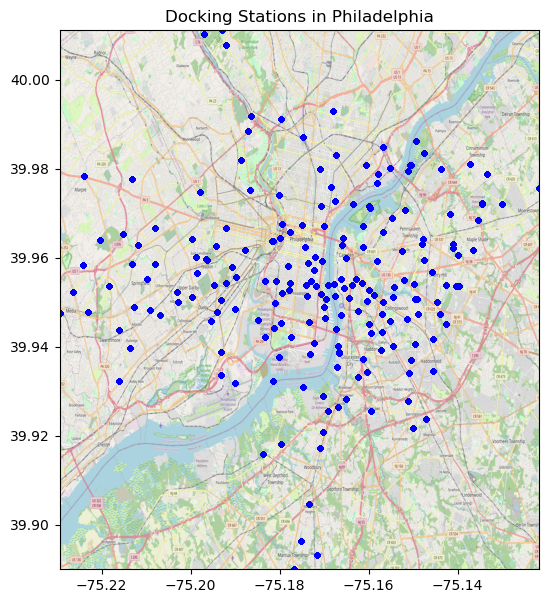

In [55]:
# Plot all of our docking stations
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_merged['end_lon'], df_merged['end_lat'], zorder=1, alpha= 0.2, c='b', s=10) #scatter
ax.set_title('Docking Stations in Philadelphia')
ax.set_xlim(coordinate_range[0],coordinate_range[1])
ax.set_ylim(coordinate_range[2],coordinate_range[3])
ax.imshow(phila_map2, zorder=0, extent = coordinate_range, aspect= 'equal') #Phila map background

plt.savefig('Philadelphia_plot.png') 

In [ ]:
#Only select POIs that are near our docking stations 

In [20]:
#First increase/decrease the 3. decimal point of our coordinates by 1 (= 111 meters) to not leave out our max/min coordinates of docking stations

coordinate_range1 = (-75.229462 - 0.001, -75.121567 + 0.001, 39.889938 -0.001, 40.01112 + 0.001)
print(coordinate_range1)

#Now we only keep observations in our dateframe that are within those coordinates

df_POI = df_POI[((df_POI['lon'] > -75.230462) & (df_POI['lon'] < -75.120567) & (df_POI['lat'] > 39.888938) & (df_POI['lat'] < 40.012119999999996)) | ((df_POI['lon2'] > -75.230462) & (df_POI['lon2'] < -75.120567) & (df_POI['lat2'] > 39.888938) & (df_POI['lat2'] < 40.012119999999996))]

(-75.230462, -75.120567, 39.888938, 40.012119999999996)


In [21]:
#Our final dataframe has 4222 observations and 4 categories of our points of interest
len(df_POI)

4222

In [22]:
#Delete lon2 and lat2

del df_POI['lon2']
del df_POI['lat2']

In [24]:
df_POI.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [26]:
df_POI.head()

,id,lat,lon,operator,amenity,atm,tourism
222,222,39.959347,-75.19492,NaN,fast_food,NaN,NaN
223,223,39.957653,-75.19126,Citibank,atm,NaN,NaN
224,224,39.953014,-75.19229,NaN,cafe,NaN,NaN
283,283,39.963936,-75.16694,NaN,car_sharing,NaN,NaN
284,284,39.963978,-75.17041,NaN,car_sharing,NaN,NaN


In [27]:
df_POI.to_csv('POI_PA_Cleaned.csv', index=False)